# 4 動的計画法(Dynamic Programming)
## 4.1 動的計画法と方策評価
### 4.1.1 動的計画法の概要
状態$S_t$が$s$、方策が$\pi$であるときの収益の期待値を、**状態価値関数**$v_\pi(s)$と定義する。
$$
v_\pi(s)=\mathbb{E} _\pi[R_t+\gamma R_{t+1}+\gamma^2 R_{t+2}+\cdots|S_t=s]
$$
この無限級数を含む期待値の計算はできない。そこで、ベルマン方程式を用いる。
$$
v_{\pi}(s) = \sum_{a, s'} \pi(a|s) p(s'|s, a) \left\{ r(s, a, s') + \gamma v_{\pi}(s') \right\}
\tag{4.1}
$$
ベルマン方程式は、「現在の状態$s$の価値関数$v_\pi (s)$」と「次の状態$s'$の価値関数$v_\pi (s')$」との関係性を表す。DPを使った手法もベルマン方程式から導かれる。そのアイデアは、ベルマン方程式を「更新式」とすることである。これは数式で表すと、次のようになる。
$$
V_{k+1}(s) = \sum_{a, s'} \pi(a|s) p(s'|s, a) \left\{ r(s, a, s') + \gamma V_k(s') \right\}
\tag{4.2}
$$
ここで、$V_{k+1},V_k$は推測値であり、真の価値関数$v(s)$とは異なるため、大文字$V$で表記。

### 4.1.2 反復方策評価を試す
「2マスのグリッドワールド」を例にとり、反復方策評価アルゴリズムの流れを見る。

![Fig.4-2](img/fig4-2.jpg)

エージェントはランダムな方策$\pi$に従って行動する。この問題では、次の状態$s'$はf(s,a)という関数で一意に決まるので、価値関数の更新式$(4.2)$は次のように簡略化できる。

![Fig.4-3](img/fig4-3.jpg)

それでは方策$\pi$における価値関数を反復方策評価アルゴリズムを使って求める。
まずは初期値として、$V_0(s)=0$とする。2マスのグリッドワールドでは状態は2つなので、

$$
V_0(L1)=0
$$
$$
V_0(L2)=0
$$



In [1]:
V = {'L1': 0.0, 'L2': 0.0}
new_V = V.copy()

for _ in range(100):
    new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * ( 1 + 0.9 * V['L2'])
    new_V['L2'] = 0.5 * ( 0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    V = new_V.copy()
    print(V)

{'L1': 0.0, 'L2': -0.5}
{'L1': -0.22499999999999998, 'L2': -0.725}
{'L1': -0.42749999999999994, 'L2': -0.9274999999999999}
{'L1': -0.6097499999999999, 'L2': -1.10975}
{'L1': -0.7737750000000001, 'L2': -1.273775}
{'L1': -0.9213975000000002, 'L2': -1.4213975}
{'L1': -1.05425775, 'L2': -1.55425775}
{'L1': -1.1738319750000001, 'L2': -1.6738319750000001}
{'L1': -1.2814487775, 'L2': -1.7814487775}
{'L1': -1.3783038997500001, 'L2': -1.8783038997500001}
{'L1': -1.4654735097750002, 'L2': -1.965473509775}
{'L1': -1.5439261587975002, 'L2': -2.0439261587975004}
{'L1': -1.61453354291775, 'L2': -2.11453354291775}
{'L1': -1.6780801886259753, 'L2': -2.1780801886259753}
{'L1': -1.735272169763378, 'L2': -2.2352721697633777}
{'L1': -1.7867449527870403, 'L2': -2.28674495278704}
{'L1': -1.833070457508336, 'L2': -2.3330704575083363}
{'L1': -1.8747634117575025, 'L2': -2.3747634117575025}
{'L1': -1.9122870705817523, 'L2': -2.412287070581752}
{'L1': -1.9460583635235769, 'L2': -2.446058363523577}
{'L1': -1.9764

真の価値関数の値は `[-2.25, -2.75]`で、上の結果を見ると、100回更新した時点でほぼ同じ値となっている。

次に、閾値を設定して更新する回数を自動で決める。

In [2]:
V = {'L1': 0.0, 'L2': 0.0}
new_V = V.copy()

cnt = 0
while True:
    new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])

    delta = abs(new_V['L1'] - V['L1'])
    delta = max(delta, abs(new_V['L2'] - V['L2']))
    V = new_V.copy()

    cnt += 1
    if delta < 0.0001:
        print(V)
        print(cnt)
        break

{'L1': -2.249167525908671, 'L2': -2.749167525908671}
76


ここでは閾値を`0.0001`に設定し、更新された変化量の最大値がその閾値を下回るまでループを続ける。
上の結果を見ると、76回の更新を行い、この価値関数は真の価値関数と近い値を取っている。

### 4.1.3 反復方策評価の別の実装方法
先ほどの問題で反復方策評価アルゴリズムを実装するにあたり、2つのディクショナリを使った。
1つは現状の価値関数を保持する`V`、もう1つは更新時に使用する`new_V`というディクショナリを使って、価値関数を更新した。

![Fig.4-6](img/fig4-6.png)

**図4-6**で注目したい点は、`new_V`の各要素を計算するにあたって`V`というディクショナリの値を使っていること。
この実装には別の方式がある。それは、ディクショナリの各要素を上書きする方式。

![Fig.4-7](img/fig4-7.png)

**図4-7**の方式では`V`だけを使って各要素を上書きする。ここでは、これを「上書き方式」と呼ぶ。

> 2つの方式は、どちらも無限回繰り返すことで正しい値に収束する。ただし「上書き方式」の方が更新のスピードが速くなる。

In [4]:
V = {'L1': 0.0, 'L2': 0.0}

cnt = 0
while True:
    t = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    delta = abs(t - V['L1'])
    V['L1'] = t

    t = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    delta = max(delta, abs(t - V['L2']))
    V['L2'] = t

    cnt += 1
    if delta < 0.0001:
        print(V)
        print(cnt)
        break

{'L1': -2.2493782177156936, 'L2': -2.7494201578106514}
60


今回は`V`というディクショナリだけを使い、各要素が即座に上書きされるようにした。上の結果を見ると、60回の更新で終わっていて、前回の76回よりも少ない。これから先は、「上書き方式」で反復方策評価アルゴリズムを実装する。

In [5]:
V = {'L1': 0.0, 'L2': 0.0}

cnt = 0
while True:

    t = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    delta = max(delta, abs(t - V['L2']))
    V['L2'] = t

    t = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    delta = abs(t - V['L1'])
    V['L1'] = t

    cnt += 1
    if delta < 0.0001:
        print(V)
        print(cnt)
        break

{'L1': -2.2493782177156936, 'L2': -2.7493332440857543}
59


更新する順番を変えても、同様の結果が得られる。

## 4.2 より大きな問題へ
反復方策評価アルゴリズムを使えば、状態と行動のパターン数がある程度大きくなっても高速に解くことができる。今回は**図4-8**のような「3×4のグリッドワールド」を考える。

![Fig.4-8](img/fig4-8.png)

「3×4のグリッドワールド」の問題設定
* エージェントは上下左右の4方向に進むことができる
* **図4-8**の灰色で表されたマス目は壁を表し、壁に入ることはできない
* グリッドの外側にも壁があり、それ以上先に進むことはできない
* 壁にぶつかった場合の報酬は0となる
* リンゴは報酬＋1、爆弾は報酬－1とし、それ以外は報酬は0とする
* 環境の状態遷移は一意に決まることにする。つまりエージェントが右へ進む行動を選択すると、(壁がなければ)必ず右へ進むものとする
* 今回のタスクはエピソードタスクとして、リンゴを取ったら終了とする]

### 4.2.1 GridWorldクラスの実装
ここでは`GridWorld`クラスを、`common/gridworld.py`に実装する。

#### `common/gridworld.py`

---
```python
import numpy as np

class GridWorld:
    def __init__(self):
        self.action_space = [0, 1, 2, 3]
        self.action_meaning = {
            0: "UP",
            1: "DOWN",
            2: "LEFT",
            3: "RIGHT",
        }

        self.reward_map = np.array(
            [[0, 0, 0, 1.0],
             [0, None, 0, -1.0],
             [0, 0, 0, 0]]
        )
        self.goal_state = (0, 3)
        self.wall_state = (1, 1)
        self.start_state = (2, 0)
        self.agent_state = self.start_state
```
---

`GridWorld`クラスには、いくつかのインスタンス変数を持たせる。`self.action\_space`は行動空間、つまりは「行動の候補」を表します。上のコードでは行動は`[0, 1, 2, 3]`の4つの番号で表され、各番号の意味は`self.action\_meaning`で定義されています。たとえば、`0`は上 (`UP`) 、`1` は下 (`DOWN`) への移動を意味します。`self.reward\_map`は報酬マップです。この報酬マップは、各マス目に移動したときに得られる報酬の値を表します。報酬マップは、NumPy の 2 次元配列 (`np.ndarray`) で準備する関係で、座標系は**図4-9**のようになります。

![Fig.4-9](img/fig4-9.png)
<img src = "img/fig4-9.png">

また、今回の問題はエピソードタスクになっている。

続いて、`GridWorld`クラスのメソッドを示す。

#### `common/gridworld.py`

---
```python
import numpy as np

class GridWorld:
    ...

    @property
    def height(self):
        return len(self.reward_map)

    @property
    def width(self):
        return len(self.reward_map[0])

    @property
    def shape(self):
        return self.reward_map.shape

    def actions(self):
        return self.action_space    # [0, 1, 2, 3]

    def states(self):
        for h in range(self.height):
            for w in range(self.width):
                yield (h, w)
```
---

ここでは `@property` デコレーターを使って `GridWorld` クラスに便利なインスタンス変数をいくつか実装している。`@property` デコレーターは、メソッド名の前に配置することで、対象のメソッドをインスタンス変数として使用することができる。今回の場合は、次のようにグリッドワールドの大きさや形状を知ることができる。


In [7]:
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
import numpy as np
from common.gridworld import GridWorld

env = GridWorld()

# env.height() ではなく env.height として使用できる
print(env.height)   # 3
print(env.width)    # 4
print(env.shape)    # (3, 4)

3
4
(3, 4)


また、上のコードでは `GridWorld` クラスに `actions` と `states` というメソッドも実装した。このメソッドを使えば、すべての行動、すべての状態に対して順にアクセスできる。使用例は次のとおり。


In [8]:
for action in env.actions():
    print(action)

print('===')

for state in env.states():
    print(state)

0
1
2
3
===
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)


それでは次に、環境の状態遷移を表すメソッド `next_state()` と報酬関数のメソッド `reward()` を実装する。コードは次のとおり。

```python
class GridWorld:
    ...

    def next_state(self, state, action):
        # ① 移動先の場所の計算
        action_move_map = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        move = action_move_map[action]
        next_state = (state[0] + move[0], state[1] + move[1])
        ny, nx = next_state

        # ② 移動先がグリッドワールドの枠の外か、それとも移動先が壁か？
        if nx < 0 or nx >= self.width or ny < 0 or ny >= self.height:
            next_state = state
        elif next_state == self.wall_state:
            next_state = state

        return next_state   # ③ 次の状態を返す

    def reward(self, state, action, next_state):
        return self.reward_map[next_state]

コードの①では、壁やグリッドワールドの枠は一旦無視して移動先を計算する。そして②で枠外や壁に移動していないかの判定を行い、移動できない場合は `next_state = state` とする。また、今回のタスクでは、状態遷移は決定論的なので、コードの③では次の状態を返す。

報酬関数のメソッドである `reward(self, state, action, next_state)` は、数式の `r(s, a, s')` の引数に対応させたため、そのような引数にしている。ただし今回の問題では、次の状態だけを使って報酬の値を決定する。

その他に、`GridWorld` クラスには、可視化のために `render_v(self, v=None, policy=None)` というメソッドを用意している。次のように使うことができる。


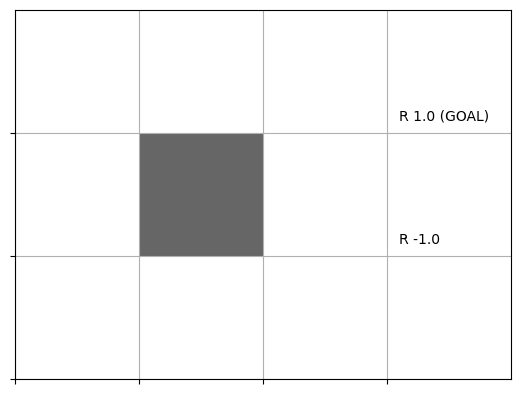

In [9]:
env = GridWorld()
env.render_v()

壁はグレーで描画され、マス目の左下には報酬の値が描画される。報酬が0の場所は空白で描画される。この`render_v`メソッドは、状態価値関数を引数に与えることができる。試しに、ダミーの状態価値関数を与えて描画して見る。

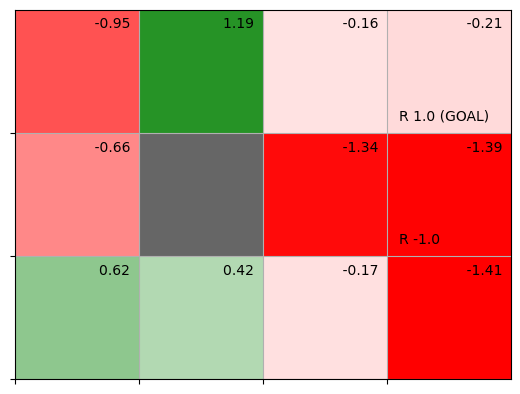

In [ ]:
# ch04/gridworld_play.py
env = GridWorld()
V = {}
for state in env.states():
    V[state] = np.random.randn()  # ダミーの状態価値関数
env.render_v(V)

ここではダミーの価値関数として `V` を用意した。`render_v` メソッドに価値関数を与えると、各場所における価値関数の値がマスの右上に表示される。また、その値に応じてヒートマップで――マイナスになればなるほど赤が強くなり、プラスになればなるほど線が強くなるように――描画される。

続いて、反復方策評価アルゴリズムを実装する前に、Python標準ライブラリにある`collections.defaultdict`の使い方を説明する。`defaultdict`を使うと、価値関数や方策をシンプルに実装できる。

### 4.2.2 defaultdictの使い方

これまでの例では、私たちは価値関数をディクショナリとして実装してきた。たとえば、次のようなコード。

```python
from common.gridworld import GridWorld

env = GridWorld()
V = {}

# ディクショナリの要素の初期化
for state in env.states():
    V[state] = 0

state = (1, 2)  # 状態 (1, 2) の価値関数を出力
print(V[state])
```

上の例では、`V = {}` として価値関数をディクショナリとして実装している。ディクショナリは、`V[key]` のように使いますが、`key` が存在しない場合にはエラーになる。そのため、上のように最初にすべての要素を初期化する必要がある。この初期化の手間を解消するのが、Python 標準ライブラリにある `defaultdict` である。これを次のように使うことができる。

```python
from collections import defaultdict  # defaultdictをインポート
from common.gridworld import GridWorld

env = GridWorld()
V = defaultdict(lambda: 0)  # デフォルト値 0 の defaultdict

state = (1, 2)
print(V[state])  # 0
```

このように、`defaultdict` を使えば、キーが存在しない場合でもデフォルト値を返すので、初期化の手間が省ける。


In [12]:
from collections import defaultdict

### 4.2.3 反復方策評価の実装
反復方策評価アルゴリズムを実装する。
まずは、1ステップの更新だけを行うメソッドを実装する。
ここで実装する `eval_onestep` 関数は、次の引数を取る。

* `pi (defaultdict)`: 方策
* `V (defaultdict)`: 価値関数
* `env (GridWorld)`: 環境
* `gamma (float)`: 割引率


In [14]:
def eval_onestep(pi, V, env, gamma=0.9):
    for state in env.states():  # ①各状態へアクセス
        if state == env.goal_state: # ②ゴールの価値関数は常に0
            V[state] = 0
            continue

        action_probs = pi[state]    # probsはprobabilitiesの略
        new_V = 0

        # ③各行動へアクセス
        for action, action_prob in action_probs.items():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            # ④新しい価値関数
            new_V += action_prob * (r + gamma * V[next_state])
        V[state] = new_V
    return V

コードの①ではすべての状態を1つずつたどる。図で表すと次のようになる。

![Fig.4-12](img\fig4-12.png)

後は、反復方策評価アルゴリズムの更新式である式 (4.3) に当てはめる（再掲）。

$$
s' = f(s, a)として、
$$

$$
V_{k+1}(s) = \sum_a \pi(a|s) \left\{ r(s, a, s') + \gamma V_k(s') \right\}
\tag{4.3}
$$

式 (4.3) とコードの④を見比べると、対応関係がはっきりする。この `eval_onestep` 関数では、価値関数の 1 ステップの更新が終わる。後は、この更新を繰り返し行う。そのためのメソッドは次のように実装できる。


In [15]:
def policy_eval(pi, V, env, gamma, threshold=0.001):
    while True:
        old_V = V.copy()
        V = eval_onestep(pi, V, env, gamma)

        delta = 0
        for state in V.keys():
            t = abs(V[state] - old_V[state])
            if delta < t:
                delta = t

        if delta < threshold:
            break
    return V

引数の `threshold` は更新時の閾値である。上のコードで示すとおり、繰り返し `eval_onestep` 関数を呼び出し、更新された量の最大値が閾値より小さくなったら更新をストップする。

それでは、これまで実装した `GridWorld` クラスと `policy_eval` 関数を使って、方策評価を行ってみる。コードは次のとおりである。


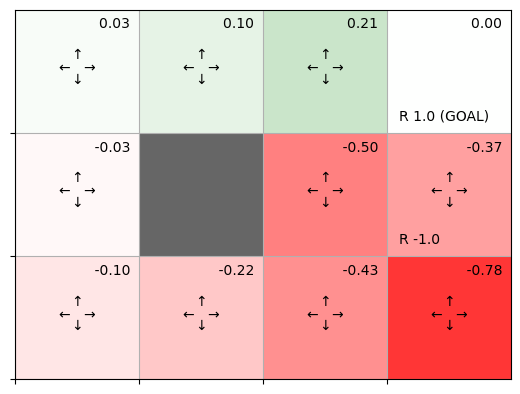

In [16]:
if __name__ == '__main__':
    env = GridWorld()
    gamma = 0.9

    pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
    V = defaultdict(lambda: 0)

    V = policy_eval(pi, V, env, gamma)
    env.render_v(V, pi)

図 4-13 は、ランダムな方策における価値関数を示している。たとえば、左下のスタート地点の価値関数は -0.10 となっている。これは、左下の地点からランダムに動くと、得られる収益の期待値が -0.10 になるということだ。エージェントはランダムに動くので、爆弾を避けて得られる報酬 (+1 の報酬) よりも爆弾 (-1 の報酬) を得る確率が少し大きいことがわかる。

全体的に見ると、一番下の行と真ん中の行はすべてがマイナスになっている。それらの場所では爆弾の影響が大きいことがわかる。

このようなコードを実行すると、結果は一瞬で得られる。DP を使うことで、効率的に方策の評価を行うことができる。これで、グリッドワールドのサイズが（ある程度）大きくなっても大丈夫。しかし、まだ私たちは方策の評価だけしか行っていない。続いて、最適方策を見つける方法について見ていく。
